## Insurance Cross Selling Binary Cassification:
Source of data: Kaggle competition, link: https://www.kaggle.com/c/playground-series-s4e7/data?select=train.csv 

Dataset is about an Insurance company that has provided Health Insurance to its customers, and the goal is to build a model to predict whether the policyholders (customers) from the past year will also be interested in Vehicle Insurance provided by the company. Evaluation metric used is area under ROC curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('/Users/julesbellosguardo/Downloads/insurance_cross_selling_train.csv')
test_df = pd.read_csv('/Users/julesbellosguardo/Downloads/insurance_cross_selling_test.csv')

In [7]:
train_df.shape, test_df.shape

((11504798, 12), (7669866, 11))

In [3]:
#Taking random sample from train dataframe to reduce training time:

train_df = train_df.sample(frac=0.02)
test_df = test_df.sample(frac = 0.02)
train_df.shape, test_df.shape

((230096, 12), (153397, 11))

In [9]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
5715763,5715763,Male,25,1,33.0,1,< 1 Year,No,32411.0,152.0,98,0
3845030,3845030,Male,46,1,11.0,1,1-2 Year,No,29069.0,26.0,121,0
1022672,1022672,Female,27,1,33.0,1,< 1 Year,No,33209.0,152.0,42,0
7061408,7061408,Male,54,1,46.0,1,1-2 Year,No,24336.0,26.0,263,0
10154058,10154058,Male,44,1,28.0,0,1-2 Year,Yes,30204.0,124.0,216,0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230096 entries, 10244568 to 3270892
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    230096 non-null  int64  
 1   Gender                230096 non-null  object 
 2   Age                   230096 non-null  int64  
 3   Driving_License       230096 non-null  int64  
 4   Region_Code           230096 non-null  float64
 5   Previously_Insured    230096 non-null  int64  
 6   Vehicle_Age           230096 non-null  object 
 7   Vehicle_Damage        230096 non-null  object 
 8   Annual_Premium        230096 non-null  float64
 9   Policy_Sales_Channel  230096 non-null  float64
 10  Vintage               230096 non-null  int64  
 11  Response              230096 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 22.8+ MB


In [4]:
#Starting by dropping id column as it is of no use:
train_df = train_df.drop('id', axis=1)


In [12]:
#Checking for missing values:
train_df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: xlabel='Response', ylabel='count'>

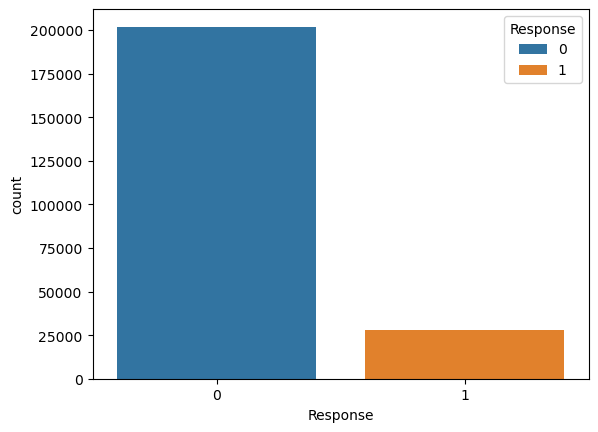

In [14]:
#Checking balance of target variable (Response):

sns.countplot(data = train_df, x = 'Response', hue = 'Response')

In [7]:
#Proportion of minority class:
round(len(train_df[train_df['Response'] == 1])/len(train_df), 3)

0.122

#### Our target variable is highly unbalanced here, will balance it out later on

# EDA:

In [20]:
train_df.corr(numeric_only=True)['Response'].sort_values()[:-1]

Previously_Insured     -0.346004
Policy_Sales_Channel   -0.152505
Vintage                -0.016245
Driving_License         0.008847
Region_Code             0.015714
Annual_Premium          0.030964
Age                     0.121099
Name: Response, dtype: float64

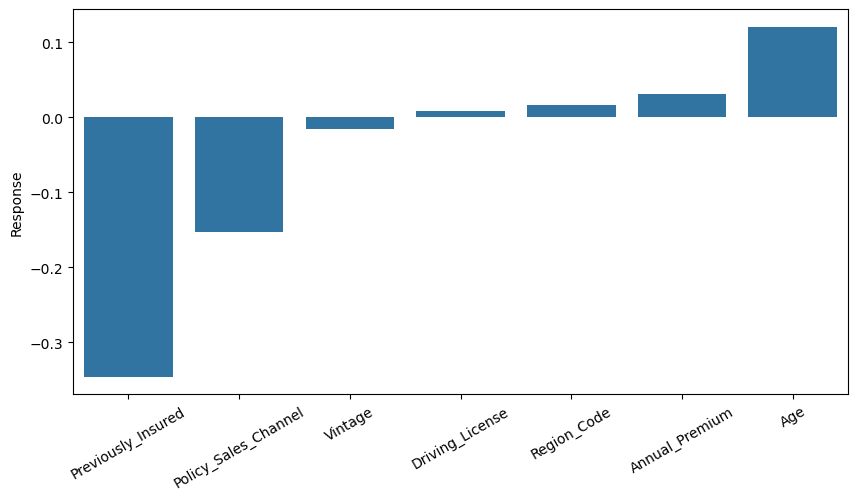

In [23]:
#Looking at feature correlations with target variable:


plt.figure(figsize=(10,5))
sns.barplot(train_df.corr(numeric_only=True)['Response'].sort_values()[:-1])
plt.tick_params(axis = 'x', labelrotation = 30)

<Axes: xlabel='Response', ylabel='count'>

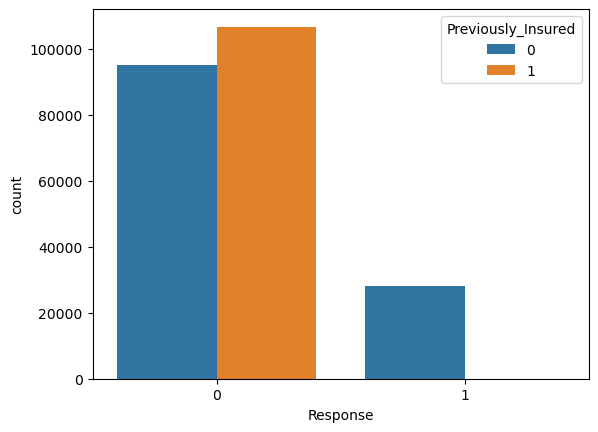

In [27]:
#Looking at customers who responded based off if they were previously insured
sns.countplot(data = train_df, x = 'Response', hue = 'Previously_Insured')

In [28]:
train_df.Annual_Premium.describe()

count    230096.000000
mean      30471.919973
std       16504.476792
min        2630.000000
25%       25278.000000
50%       31847.000000
75%       39470.250000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Axes: xlabel='Annual_Premium', ylabel='Count'>

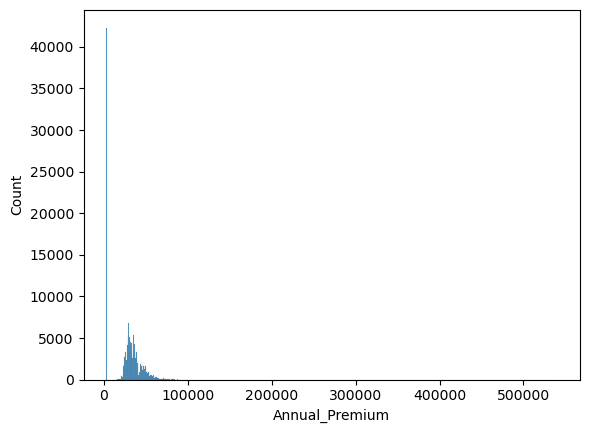

In [30]:
#Distribution of annual premiums:

sns.histplot(data = train_df, x = 'Annual_Premium')


(0.0, 10000.0)

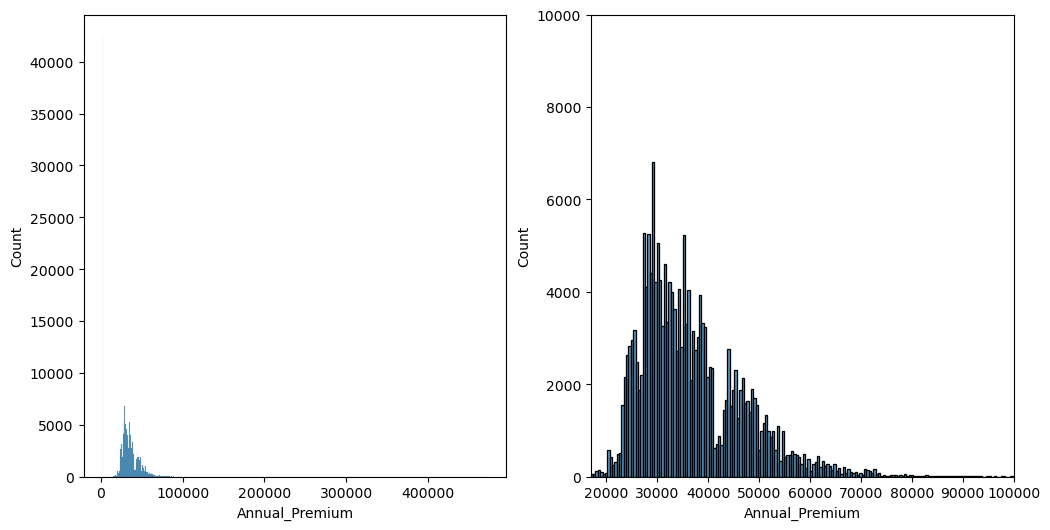

In [28]:
#We'll plot the premiums by range of values as there seem to be 2 dense areas:

f, axes = plt.subplots(1, 2, figsize = (12,6))
sns.histplot(data = train_df, x = 'Annual_Premium', ax = axes[0])
plt.xlim((0, 15000))
plt.ylim((0,10000))

sns.histplot(data = train_df, x = 'Annual_Premium', ax = axes[1])
plt.xlim((17000, 100000))
plt.ylim((0,10000))


In [30]:
len(train_df[train_df['Annual_Premium'] == 2630])

42430

(0.0, 100000.0)

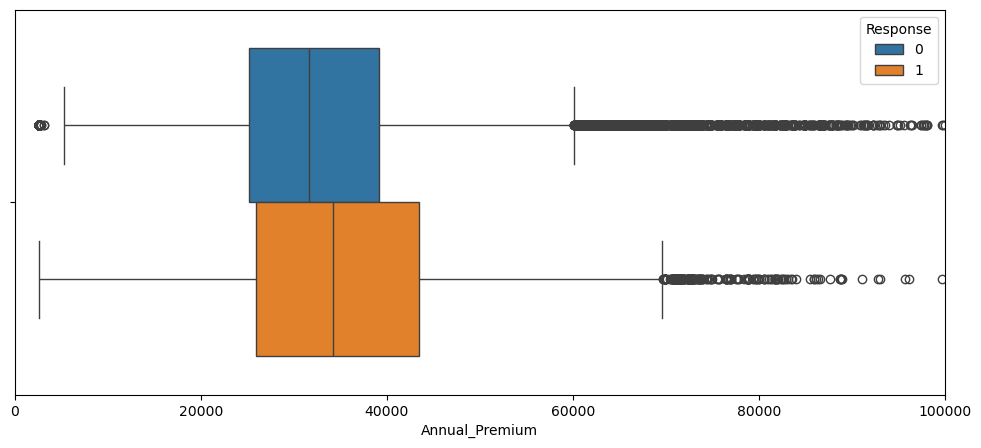

In [32]:
plt.figure(figsize=(12,5))
sns.boxplot(data = train_df, x = 'Annual_Premium', hue = 'Response')
plt.xlim((0,100000))

(0.0, 100000.0)

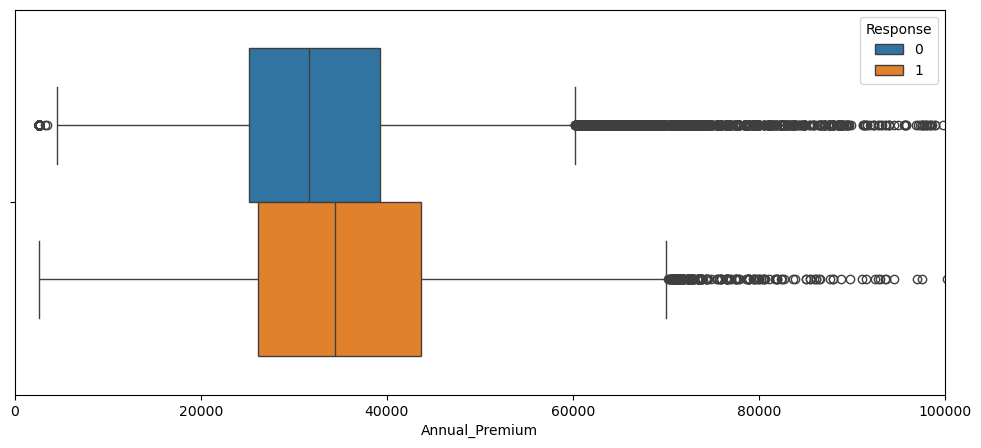

In [9]:
#Taking extreme outliers out of visual:
plt.figure(figsize=(12,5))
sns.boxplot(data = train_df, x = 'Annual_Premium', hue = 'Response')
plt.xlim((0,100000))

In [11]:
train_df.Driving_License.value_counts()

Driving_License
1    229616
0       480
Name: count, dtype: int64

<Axes: xlabel='Driving_License', ylabel='count'>

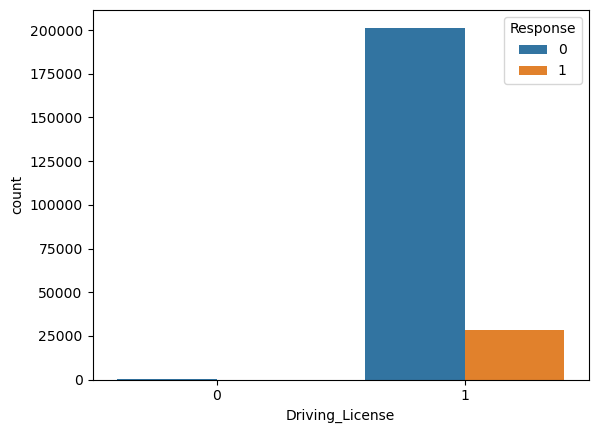

In [12]:
sns.countplot(data = train_df, x = 'Driving_License', hue = 'Response')

Countplot supports obvious fact that nobody without a drivers license responded, or was contacted 

<Axes: xlabel='Response', ylabel='count'>

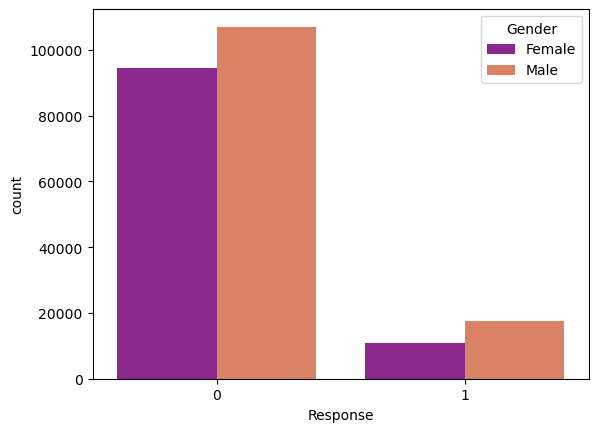

In [5]:
sns.countplot(data=train_df, x = 'Response', hue = 'Gender', palette = 'plasma')

<Axes: xlabel='Age', ylabel='Count'>

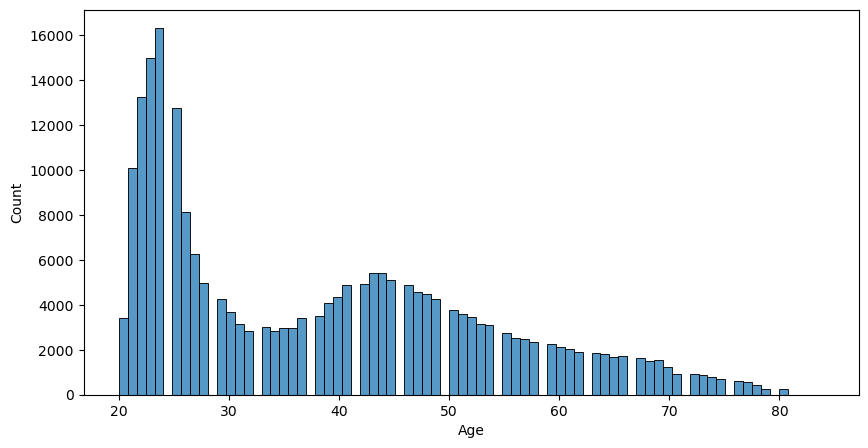

In [23]:
#Looking at general distribution of client ages:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x = 'Age')

In [9]:
#Mean age of those who responded and those who didn't:

responded_mean_age = train_df[train_df['Response'] == 1]['Age'].mean()
no_response_mean_age = train_df[train_df['Response'] == 0]['Age'].mean()

print(f'Mean age of clients who responded: {round(responded_mean_age, 2)}')
print(f'Mean age of clients who didn\'t respond: {round(no_response_mean_age, 2)}')

Mean age of clients who responded: 43.34
Mean age of clients who didn't respond: 37.7


In [34]:
responded_age_std = train_df[train_df['Response'] == 1]['Age'].std()
no_response_age_std = train_df[train_df['Response'] == 0]['Age'].std()

print(f'Variation in age of clients who responded: {round(responded_age_std, 2)}')
print(f'Variation in age of clients who didn\'t respond: {round(no_response_age_std, 2)}')

Variation in age of clients who responded: 11.41
Variation in age of clients who didn't respond: 15.3


Response age is older on average and could be for several reasons (decreased taste for risk, more money to afford insurance, etc.)

In [25]:
train_df["Region_Code"].value_counts()

Region_Code
28.0    69364
8.0     20574
46.0    11534
41.0    11088
15.0     8047
30.0     7402
29.0     6720
50.0     6052
11.0     5603
36.0     5237
3.0      4972
33.0     4580
47.0     4559
35.0     3966
6.0      3629
45.0     3087
37.0     3081
18.0     2964
39.0     2786
14.0     2760
21.0     2503
10.0     2486
2.0      2422
48.0     2222
13.0     2086
7.0      1895
9.0      1865
12.0     1792
27.0     1571
43.0     1562
32.0     1529
17.0     1498
26.0     1467
24.0     1426
25.0     1423
0.0      1209
20.0     1166
38.0     1166
23.0     1125
31.0     1087
4.0      1067
16.0     1067
49.0     1020
34.0      987
19.0      909
1.0       706
22.0      704
5.0       696
40.0      668
44.0      399
42.0      262
52.0       69
51.0       37
Name: count, dtype: int64

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

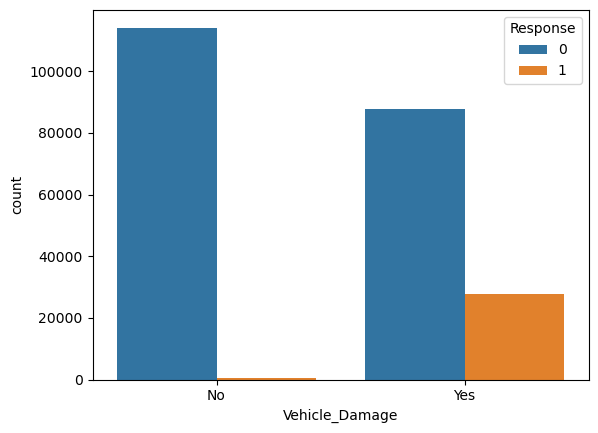

In [35]:
sns.countplot(data = train_df, x = 'Vehicle_Damage', hue = 'Response')

In [11]:
#Rates of response are clearly higher for those with vehicle damage, let's get an exact percentage:
response_rate_veh_dmg = len(train_df[(train_df['Vehicle_Damage'] == 'Yes') & (train_df['Response'] == 1)]) / len(train_df[(train_df['Vehicle_Damage'] == 'Yes')])

response_rate_no_veh_dmg = len(train_df[(train_df['Vehicle_Damage'] == 'No') & (train_df['Response'] == 1)]) / len(train_df[(train_df['Vehicle_Damage'] == 'No')])

print(f'Percentage of those who have vehicle damage that responded: {round(response_rate_veh_dmg * 100, 2)}%')
print(f'Percentage of those without vehicle damage that responded: {round(response_rate_no_veh_dmg * 100, 2)}%')

Percentage of those who have vehicle damage that responded: 24.15%
Percentage of those without vehicle damage that responded: 0.42%


Very significant difference in response rates between those with and without vehicle damage

In [42]:
train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1144249,Female,23,1,23.0,1,< 1 Year,No,33877.0,152.0,50,0
1527971,Male,36,1,11.0,0,1-2 Year,Yes,28312.0,124.0,259,1
9158120,Female,23,1,29.0,1,< 1 Year,No,33877.0,152.0,55,0
4654728,Male,40,1,31.0,0,1-2 Year,Yes,2630.0,148.0,266,1
7832682,Female,23,1,13.0,1,< 1 Year,No,28743.0,151.0,273,0


<Axes: xlabel='Response', ylabel='count'>

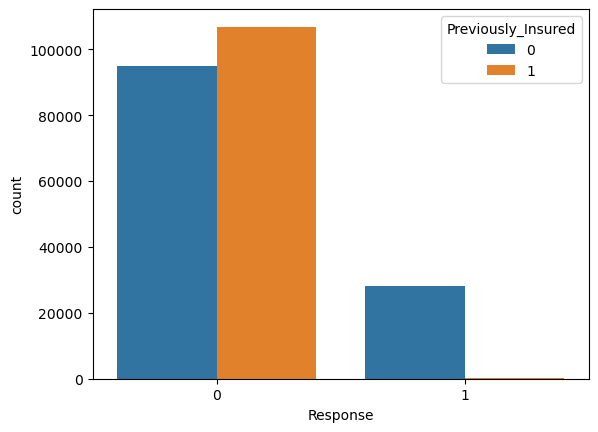

In [43]:
sns.countplot(data = train_df, x = 'Response', hue = 'Previously_Insured')

Just about all of those who responded weren't previously insured by the company 

In [44]:
train_df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     119778
< 1 Year     100975
> 2 Years      9343
Name: count, dtype: int64

<Axes: xlabel='Vehicle_Age', ylabel='count'>

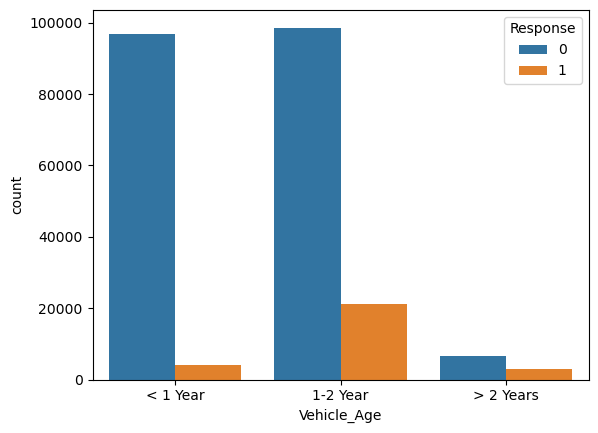

In [45]:
sns.countplot(data = train_df, x = 'Vehicle_Age', hue = 'Response')

In [5]:
#Rates of response seem to increase as vehicle age does, let us see concrete numbers:

more_2_yrs_rate = len(train_df[(train_df['Vehicle_Age'] == '> 2 Years') & (train_df['Response'] == 1)]) / len(train_df[train_df['Vehicle_Age'] == '> 2 Years'])
one_to_two_yrs_rate = len(train_df[(train_df['Vehicle_Age'] == '1-2 Year') & (train_df['Response'] == 1)]) / len(train_df[train_df['Vehicle_Age'] == '1-2 Year'])
less_one_yr_rate = len(train_df[(train_df['Vehicle_Age'] == '< 1 Year') & (train_df['Response'] == 1)]) / len(train_df[train_df['Vehicle_Age'] == '< 1 Year'])

print(f'Percentage response for those with vehicles 2 years or older: {round(more_2_yrs_rate*100, 2)}%')
print(f'Percentage response for those with vehicles between 1 and 2 years old: {round(one_to_two_yrs_rate*100, 2)}%')
print(f'Percentage response for those with vehicles less than 1 year old: {round(less_one_yr_rate*100, 2)}%')


Percentage response for those with vehicles 2 years or older: 30.06%
Percentage response for those with vehicles between 1 and 2 years old: 17.95%
Percentage response for those with vehicles less than 1 year old: 4.05%


### Feature engineering / Conversion to numerical:

In [5]:
train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
3222483,Female,24,1,41.0,0,< 1 Year,No,67748.0,124.0,152,0
8199498,Male,45,1,28.0,0,> 2 Years,Yes,29130.0,122.0,90,0
8002563,Female,22,1,2.0,0,< 1 Year,No,2630.0,26.0,34,0
8536998,Female,28,1,34.0,1,< 1 Year,No,28255.0,152.0,117,0
6924338,Female,25,1,33.0,1,< 1 Year,No,37388.0,152.0,232,0


In [4]:
def gender_binary(gender):
    if gender == 'Male':
        return 1
    else:
        return 0
    
train_df['Gender'] = train_df['Gender'].apply(lambda x: gender_binary(x))
test_df['Gender'] = test_df['Gender'].apply(lambda x: gender_binary(x))

In [5]:
def damage_binary(veh_dmg):
    if veh_dmg == 'Yes':
        return 1
    else:
        return 0
    
train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].apply(lambda x: damage_binary(x))
test_df['Vehicle_Damage'] = test_df['Vehicle_Damage'].apply(lambda x: damage_binary(x))

Since Response rate seemed to increase with vehicle age, we will encode the categories accordingly:

In [6]:
train_df['Vehicle_Age'] = train_df['Vehicle_Age'].map({'1-2 Year' : 0, '> 2 Years' : 1, '< 1 Year' : 2})
test_df['Vehicle_Age'] = test_df['Vehicle_Age'].map({'1-2 Year' : 0, '> 2 Years' : 1, '< 1 Year' : 2})

##### Splitting data into train and validation set + using SMOTE to balance target variable:

In [7]:
X_train = train_df.drop('Response', axis=1)
y_train = train_df['Response']

X_test = test_df.drop('id', axis=1)

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())
print()
print(y_train_smote.value_counts())

Response
0    201873
1     28223
Name: count, dtype: int64

Response
0    201873
1    201873
Name: count, dtype: int64


#### Predictions using Tensorflow Decision Forests:

In [33]:
import tensorflow_decision_forests as tfdf

2024-08-13 10:43:23.215512: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_smote, y_train_smote, test_size=0.30)

In [35]:
train_pd_smote_df = pd.concat([X_train_smote, y_train_smote], axis=1)
validation_pd_df = pd.concat([X_val, y_val], axis = 1)

In [36]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [37]:
label = 'Response'
tf_train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_pd_smote_df, label = label, task = tfdf.keras.Task.CLASSIFICATION)
tf_val_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(validation_pd_df, label = label, task=tfdf.keras.Task.CLASSIFICATION)


In [38]:
#Let's use a Random Forest Model:
tf_rand_forest = tfdf.keras.RandomForestModel()
tf_rand_forest.compile()

Use /var/folders/18/_q0z_1k55hb814fgjk4yb8pc0000gn/T/tmp84564c9r as temporary training directory


In [39]:
tf_rand_forest.fit(x = tf_train_dataset, validation_data=[tf_val_dataset])

Reading training dataset...
Training dataset read in 0:00:08.410137. Found 403186 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(120956, shape=(), dtype=int32)
Validation dataset read in 0:00:01.377697. Found 120956 examples.
Training model...


[INFO 24-08-13 10:46:41.4121 EDT kernel.cc:1233] Loading model from path /var/folders/18/_q0z_1k55hb814fgjk4yb8pc0000gn/T/tmp84564c9r/model/ with prefix b42b0041d0c448e0
[INFO 24-08-13 10:46:45.4057 EDT decision_forest.cc:734] Model loaded with 300 root(s), 1425530 node(s), and 10 input feature(s).
[INFO 24-08-13 10:46:45.4058 EDT abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-08-13 10:46:45.4058 EDT kernel.cc:1061] Use fast generic engine


Model trained in 0:03:05.493760
Compiling model...
Model compiled.


In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [40]:
tf_rf_preds = tf_rand_forest.predict(tf_val_dataset)
print(roc_auc_score(y_val, tf_rf_preds))

121/121 [==============================] - 9s 71ms/step
0.929529970398403


In [46]:
#making predictions binary to look at classification report and confusion matrix:
tf_rf_binary_preds = []
def pred_binary(pred):
    if pred >= 0.5:
        return 1
    else:
        return 0
    
for pred in tf_rf_preds:
    class_ = pred_binary(pred)
    tf_rf_binary_preds.append(class_)

<Axes: >

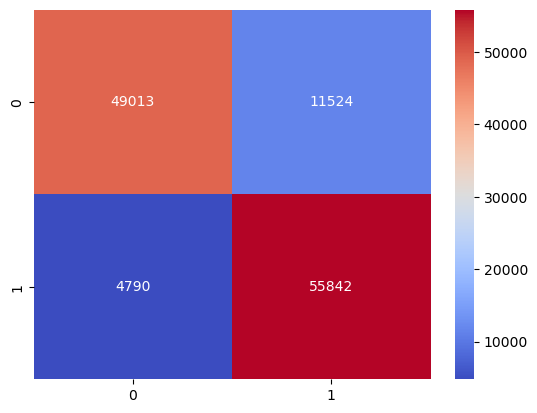

In [47]:
cm = confusion_matrix(y_val, tf_rf_binary_preds)
sns.heatmap(data = cm, annot=True, fmt='g', cmap = 'coolwarm')

In [48]:
print(classification_report(y_val, tf_rf_binary_preds))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     60537
           1       0.83      0.92      0.87     60632

    accuracy                           0.87    121169
   macro avg       0.87      0.87      0.86    121169
weighted avg       0.87      0.87      0.86    121169



 Decent accuracy of 0.87, though within the context of this problem that isn't saying much as 88% of the observations in the dataset belonged to one class (0). Out of all positive predictions our model made, 83% were correct
 
Our model also has quite a good recall for our target variable, as out of everyone who responded, the model correctly classified 92% of them.

This model will be used to make submissions to the Kaggle competition. Though tuning could maybe be done to squeeze a bit more performance out of the model, none will be done in this project due to long training times.

Also worth noting: Better performance could almost certainly be achieved by using more of the data to train the model (I used 2% of the train dataset), however less data was used to decrease training time, trading off performance

## SKL Logistic Regression

In [16]:
#Scaling Data for Logistic Regression:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

X_train_smote_scaled = scaler.fit_transform(X_train_smote)

In [18]:
X_train_smote_scaled.shape

(403746, 11)

In [19]:
X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_train_smote_scaled, y_train_smote, test_size=0.30)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train_lr, y_train_lr)

LogisticRegression()

In [21]:
validation_preds = log_reg.predict_proba(X_val_lr)
#validation_prob_preds = log_reg.predict_proba(X_val)
validation_preds

array([[9.99815107e-01, 1.84893217e-04],
       [6.73087378e-01, 3.26912622e-01],
       [9.98949617e-01, 1.05038297e-03],
       ...,
       [1.67203747e-01, 8.32796253e-01],
       [1.56331833e-01, 8.43668167e-01],
       [6.25483871e-01, 3.74516129e-01]])

In [22]:
logreg_preds = []
def pred_binary(pred):
    if pred >= 0.5:
        return 1
    else:
        return 0

for prediction in validation_preds[:,1]:
    bin_pred = pred_binary(prediction)
    logreg_preds.append(bin_pred)


        

In [25]:
print(confusion_matrix(y_val, logreg_preds))

[[23743 36945]
 [23328 37153]]


In [26]:
print(roc_auc_score(y_val, logreg_preds))

0.5027613240095932


In [11]:
#Optimizing hyper parameters:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [28]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 
              'solver':['liblinear']}

logreg_gridsearch = GridSearchCV(estimator= log_reg, param_grid=param_grid, verbose=1)
logreg_gridsearch.fit(X_train_lr, y_train_lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             verbose=1)

In [32]:
logreg_gridsearch.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [22]:
#Redefining model and retrainming using best parameters:
tuned_log_reg = LogisticRegression(penalty='l2', C = 0.1, solver= 'liblinear')
log_reg.fit(X_train_lr, y_train_lr)

tuned_val_preds = log_reg.predict_proba(X_val_lr)

tuned_logreg_preds = []
def pred_binary(pred):
    if pred >= 0.5:
        return 1
    else:
        return 0

for prediction in tuned_val_preds[:,1]:
    bin_pred = pred_binary(prediction)
    tuned_logreg_preds.append(bin_pred)

print(confusion_matrix(y_val_lr, tuned_logreg_preds))

[[43858 16828]
 [ 5363 55075]]


In [23]:
print(roc_auc_score(y_val_lr, tuned_logreg_preds))

0.8169840950153073


In [24]:
print(print(classification_report(y_val_lr, tuned_logreg_preds)))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80     60686
           1       0.77      0.91      0.83     60438

    accuracy                           0.82    121124
   macro avg       0.83      0.82      0.82    121124
weighted avg       0.83      0.82      0.82    121124

None


Pretty good improvement but still not as good as tensorflow decision forests. Could try running a grid search using other solvers. Also, as stated, the best way would be to just take a bigger sample from the original dataset

## SKL Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rand_forest = RandomForestClassifier()

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train_smote, y_train_smote, test_size=0.30)

In [16]:
rand_forest.fit(X_train, y_train)
rf_val_preds = rand_forest.predict(X_val)

In [17]:
print(confusion_matrix(y_val, rf_val_preds))

[[51791  8760]
 [ 5057 55471]]


In [18]:
print(classification_report(y_val, rf_val_preds))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     60551
           1       0.86      0.92      0.89     60528

    accuracy                           0.89    121079
   macro avg       0.89      0.89      0.89    121079
weighted avg       0.89      0.89      0.89    121079



In [19]:
print(roc_auc_score(y_val, rf_val_preds))

0.8858902280182885


In [20]:
tuned_rand_forest = RandomForestClassifier()
rf_paramgrid = {'n_estimators': [25,50,100,150,200,250,300,500, 750, 1000], 
               'max_features': ['auto', 'sqrt'], 'max_depth': [None, 10, 20, 30, 50, 70, 90, 110],
               'min_samples_split': [2, 4, 5, 10], 'min_samples_leaf': [1, 2, 4, 5, 7], 'bootstrap': [True, False]}

rf_randsearch = RandomizedSearchCV(estimator = tuned_rand_forest, param_distributions=rf_paramgrid, n_iter = 10, cv=5,
                            verbose=2, n_jobs = -1)

rf_randsearch.fit(X_train, y_train)

rf_randsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=  50.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=  48.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time= 5.5min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time= 6.7min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=84.2min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=750; total time=56.9min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=22.0min
[CV] END bootstrap=False, max_depth=50, max_

/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [21]:
tuned_forest_preds = rf_randsearch.predict(X_val)
print(classification_report(y_val, tuned_forest_preds))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89     60551
           1       0.87      0.91      0.89     60528

    accuracy                           0.89    121079
   macro avg       0.89      0.89      0.89    121079
weighted avg       0.89      0.89      0.89    121079



In [22]:
print(roc_auc_score(y_val, tuned_forest_preds))

0.8879951756030584


Compared to the Tensor flow Decision Forest, this model has better accuracy concerning the target variable, recall on target variablle is a tiny bit worse, but its F1 Score is better. Which model to use would depend on the context of what is trying to be achieved with the model, but here it is simply to get a high ROC score, so we will use TFDF